In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

/home/deadpool/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

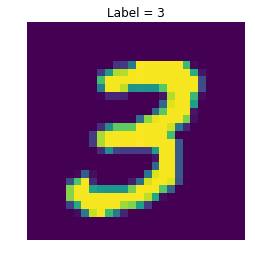

In [4]:
plt.figure()
plt.axis('off')
plt.title("Label = {}".format(y_train[7]))
plt.imshow(X_train[7])

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
print(Y_train.shape)
Y_train[9]

(60000, 10)


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
print(X_train.shape)

(60000, 28, 28, 1)


In [31]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
          batch_size=16, epochs=2, verbose=1)

Epoch 1/2
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1938 - acc: 0.9408
Epoch 2/2
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0855 - acc: 0.9747


In [33]:
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

10000/10000 [==============================] - 5s 469us/step
[0.03917773662849795, 0.9876]


In [34]:
history.params

{'batch_size': 16,
 'do_validation': False,
 'epochs': 2,
 'metrics': ['loss', 'acc'],
 'samples': 60000,
 'steps': None,
 'verbose': 1}

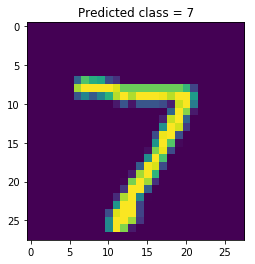

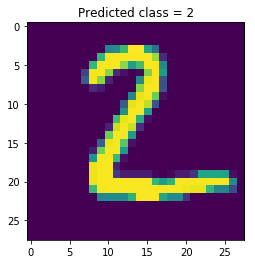

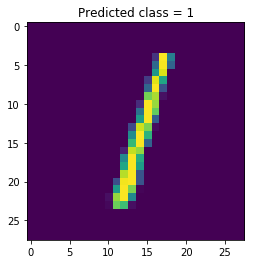

In [35]:
for i in range(3):
    cls = model.predict_classes(X_test[i].reshape(1, *X_test[i].shape))[0]
    plt.figure()
    plt.imshow(X_test[i].reshape((28, 28)))
    plt.title("Predicted class = {}".format(cls))

In [36]:
print("Score = {}\nAccuracy = {}".format(*score))

Score = 0.03917773662849795
Accuracy = 0.9876


In [37]:
model.layers